<h1 style="color:blue;text-align: center" h1> Keith Galli Sales Analysis <h1></h1>

<h3 style="color:purple;"> Importing Modules</h3>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<h3 style="color:purple;"> Merging 12 months of data</h3>

In [2]:
import os

 <h5 style="color:red;"> Creating the list of files names using os</h5>

In [3]:
files=[file for file in os.listdir("./data")]     

In [4]:
#files

 <h5 style="color:red;"> Creating an empty data frame</h5>

In [5]:
all_months_df=pd.DataFrame()                               

 <h5 style="color:red;"> Concatanating df to empty data frame</h5>

In [6]:
for files in files:
    path="./data/"+files
    df1=pd.read_csv(path)
    all_months_df=pd.concat([all_months_df,df1],ignore_index=True)

In [7]:
#all_months_df

<h3 style="color:purple;">Counting nan values</h3>

In [8]:
all_months_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<h3 style="color:purple;">Removing Nan values</h3>

<h5 style="color:red;"> Removing the rows which contain all nan values</h5>

In [9]:
all_months_df.dropna(how="all",inplace=True)

In [10]:
# all_months_df

In [11]:
all_months_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

<h3 style="color:purple;"> Exploaratory Data Analysis</h3>

<h5 style="color:red;"> Add month column</h5>

In [12]:
all_months_df["Month"]=all_months_df["Order Date"].apply(lambda x:x[:2])

In [13]:
# all_months_df["Month"].unique()    

<h5 style="color:red;">Month Column has  'Or'.Delete that row </h5>

In [14]:
or_df=all_months_df[all_months_df["Order Date"].apply(lambda x:x[:2]=="Or")]

In [15]:
# or_df

<h5 style="color:red;"> Removing the above rows from dataframe </h5>

In [16]:
all_months_df=all_months_df[all_months_df["Order Date"].apply(lambda x:x[:2]!="Or")]

In [17]:
all_months_df["Month"].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

<h5 style="color:red;"> Changing the dtype of Month to int </h5>

In [18]:
# all_months_df.dtypes

In [19]:
all_months_df["Month"]=all_months_df["Month"].astype(int)

In [20]:
all_months_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

<h3 style="color:purple;">Questions</h3>

<h4 style="color:black;">1.What was the best month for sales?</h4>

<h5 style="color:red;"> 1.Convert "Price Each and Quantity ordered" into "INT" data type </h5>

In [21]:
# all_months_df.dtypes

In [22]:
all_months_df['Quantity Ordered']=all_months_df['Quantity Ordered'].astype(int)




In [24]:
all_months_df['Price Each']=all_months_df['Price Each'].astype(float)

In [25]:
# all_months_df.dtypes

<h5 style="color:red;"> Add Sales column</h5>

In [26]:
all_months_df["sales"]=all_months_df['Price Each'] * all_months_df['Quantity Ordered']

In [29]:
# all_months_df

<h5 style="color:red;">Answering the question 1</h5>

In [34]:
all_months_df.groupby("Month").sum()["sales"]

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

<h5 style="color:red;">Bar graph of sales by month 1 using matplotlib</h5>

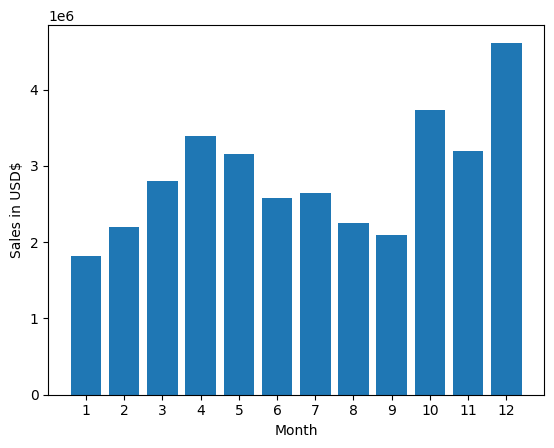

In [66]:
months=range(1,13)
plt.bar(months,all_months_df.groupby("Month").sum()["sales"])
plt.xlabel("Month")
plt.ylabel("Sales in USD$")
plt.xticks(months)
plt.show()

<h5 style="color:red;">Bar graph of sales by month 1 using Seaborn</h5>

<Axes: xlabel='Month', ylabel='sales'>

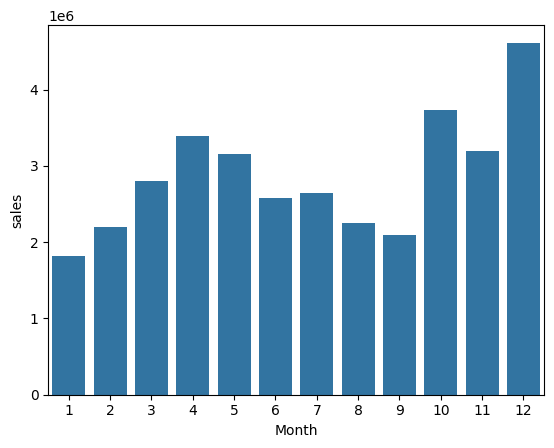

In [49]:
sns.barplot(all_months_df.groupby("Month").sum()["sales"])

<h4 style="color:black;">2.What city has highest number of sales?</h4>

In [50]:
# all_months_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<h5 style="color:red;"> Add "City" Column</h5>

In [78]:
all_months_df["City"]=all_months_df["Purchase Address"].apply(lambda x:x.split(",")[1]+" - "+x.split(",")[2])

In [79]:
 # all_months_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001


In [80]:
all_months_df.groupby("City").sum()["sales"]

City
 Atlanta -  GA 30301          2795498.58
 Austin -  TX 73301           1819581.75
 Boston -  MA 02215           3661642.01
 Dallas -  TX 75001           2767975.40
 Los Angeles -  CA 90001      5452570.80
 New York City -  NY 10001    4664317.43
 Portland -  ME 04101          449758.27
 Portland -  OR 97035         1870732.34
 San Francisco -  CA 94016    8262203.91
 Seattle -  WA 98101          2747755.48
Name: sales, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' Atlanta -  GA 30301'),
  Text(1, 0, ' Austin -  TX 73301'),
  Text(2, 0, ' Boston -  MA 02215'),
  Text(3, 0, ' Dallas -  TX 75001'),
  Text(4, 0, ' Los Angeles -  CA 90001'),
  Text(5, 0, ' New York City -  NY 10001'),
  Text(6, 0, ' Portland -  ME 04101'),
  Text(7, 0, ' Portland -  OR 97035'),
  Text(8, 0, ' San Francisco -  CA 94016'),
  Text(9, 0, ' Seattle -  WA 98101')])

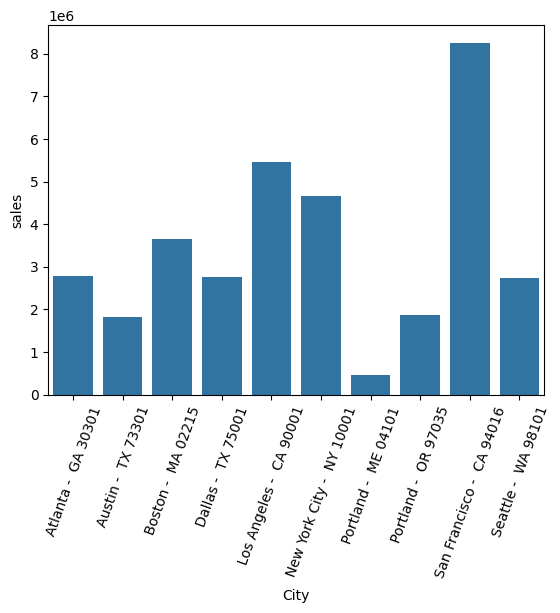

In [81]:
sns.barplot(all_months_df.groupby("City").sum()["sales"])
plt.xticks(rotation=70)


<h4 style="color:black;">3.What time should we display advertisements to maximize the likelyhood of customers buying product?</h4>

In [82]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001


<h5 style="color:red;"> Cahnge dtype of Order Date</h5>

In [108]:
# all_months_df.dtypes

In [109]:
all_months_df["Order Date"]=pd.to_datetime(all_months_df["Order Date"])

In [110]:
# all_months_df.dtypes

<h5 style="color:red;">Datetime function useful commands</h5>

Accessing date components

df['year'] = df['datetime_column'].dt.year
df['month'] = df['datetime_column'].dt.month
df['day'] = df['datetime_column'].dt.day

Accessing time components

df['hour'] = df['datetime_column'].dt.hour
df['minute'] = df['datetime_column'].dt.minute
df['second'] = df['datetime_column'].dt.second

Accessing the day of the week (Monday=0, Sunday=6

df['day_of_week'] = df['datetime_column'].dt.dayofweek

Accessing the name of the day of the 

df['day_name'] = df['datetime_column'].dt.day_name()

<h5 style="color:red;">Add New columns</h5>

In [111]:
all_months_df["Hour"]=all_months_df["Order Date"].dt.hour

In [112]:
all_months_df["Day"]=all_months_df["Order Date"].dt.day
all_months_df["year"]=all_months_df["Order Date"].dt.year
all_months_df["Name of the day"]=all_months_df["Order Date"].dt.day_name()

In [117]:
all_months_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
sales                      float64
City                        object
Hour                         int32
Day                          int32
Month_name                   int32
year                         int32
Name of the day             object
dtype: object

In [118]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Day,Month_name,year,Name of the day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX 75001,8,19,4,2019,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA 02215,22,7,4,2019,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001,14,12,4,2019,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001,14,12,4,2019,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001,9,30,4,2019,Tuesday


<h5 style="color:red;">Answer</h5>

In [122]:
all_months_df.groupby("Hour").count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Day,Month_name,year,Name of the day
Hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


<Axes: xlabel='Hour', ylabel='Product'>

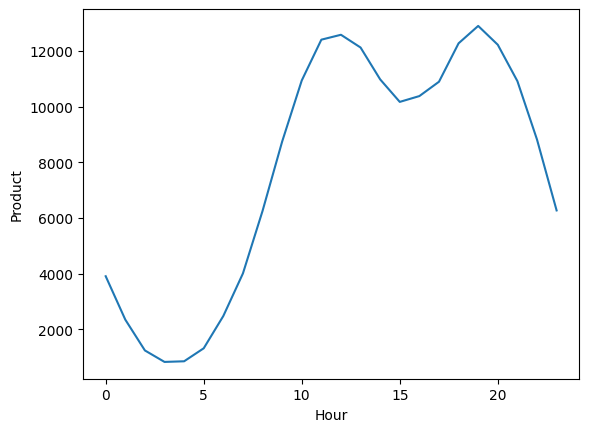

In [126]:
sns.lineplot(all_months_df.groupby("Hour").count()["Product"],markers="*")

<h4 style="color:black;">4.What products are sold together the most?</h4>

In [127]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Day,Month_name,year,Name of the day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas - TX 75001,8,19,4,2019,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston - MA 02215,22,7,4,2019,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001,14,12,4,2019,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001,14,12,4,2019,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001,9,30,4,2019,Tuesday


<h5 style="color:red;">Duplicating the df</h5>

In [164]:
dup_df=all_months_df[all_months_df["Order ID"].duplicated(keep=False)]

In [165]:
dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Day,Month_name,year,Name of the day
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001,14,12,4,2019,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001,14,12,4,2019,Friday
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001,19,3,4,2019,Wednesday
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles - CA 90001,19,3,4,2019,Wednesday
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston - MA 02215,11,7,4,2019,Sunday


In [166]:
dup_df["All Products of same order id"]=dup_df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

C:\Users\Bharath\AppData\Local\Temp\ipykernel_9284\2210375311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df["All Products of same order id"]=dup_df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))


In [167]:
dup_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Day,Month_name,year,Name of the day,All Products of same order id
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001,14,12,4,2019,Friday,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles - CA 90001,14,12,4,2019,Friday,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles - CA 90001,19,3,4,2019,Wednesday,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles - CA 90001,19,3,4,2019,Wednesday,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston - MA 02215,11,7,4,2019,Sunday,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [168]:
dup_df=dup_df[["Order ID","All Products of same order id"]].drop_duplicates()

In [169]:
dup_df

,Order ID,All Products of same order id
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [183]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7136 entries, 3 to 186841
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Order ID                       7136 non-null   object
 1   All Products of same order id  7136 non-null   object
dtypes: object(2)
memory usage: 167.2+ KB


In [172]:
dup_df.to_csv("Duplicated.csv")

In [170]:
dup_df.groupby("All Products of same order id").count()

,Order ID
All Products of same order id,
"20in Monitor,20in Monitor",3
"20in Monitor,27in FHD Monitor",2
"20in Monitor,34in Ultrawide Monitor",1
"20in Monitor,AA Batteries (4-pack)",6
"20in Monitor,AAA Batteries (4-pack)",3
...,...
"iPhone,USB-C Charging Cable",12
"iPhone,Vareebadd Phone",3
"iPhone,Wired Headphones",361


C:\Users\Bharath\AppData\Local\Temp\ipykernel_9284\2074220266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='All Products of same order id', y='Order ID', data=barplot_data, palette="viridis")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

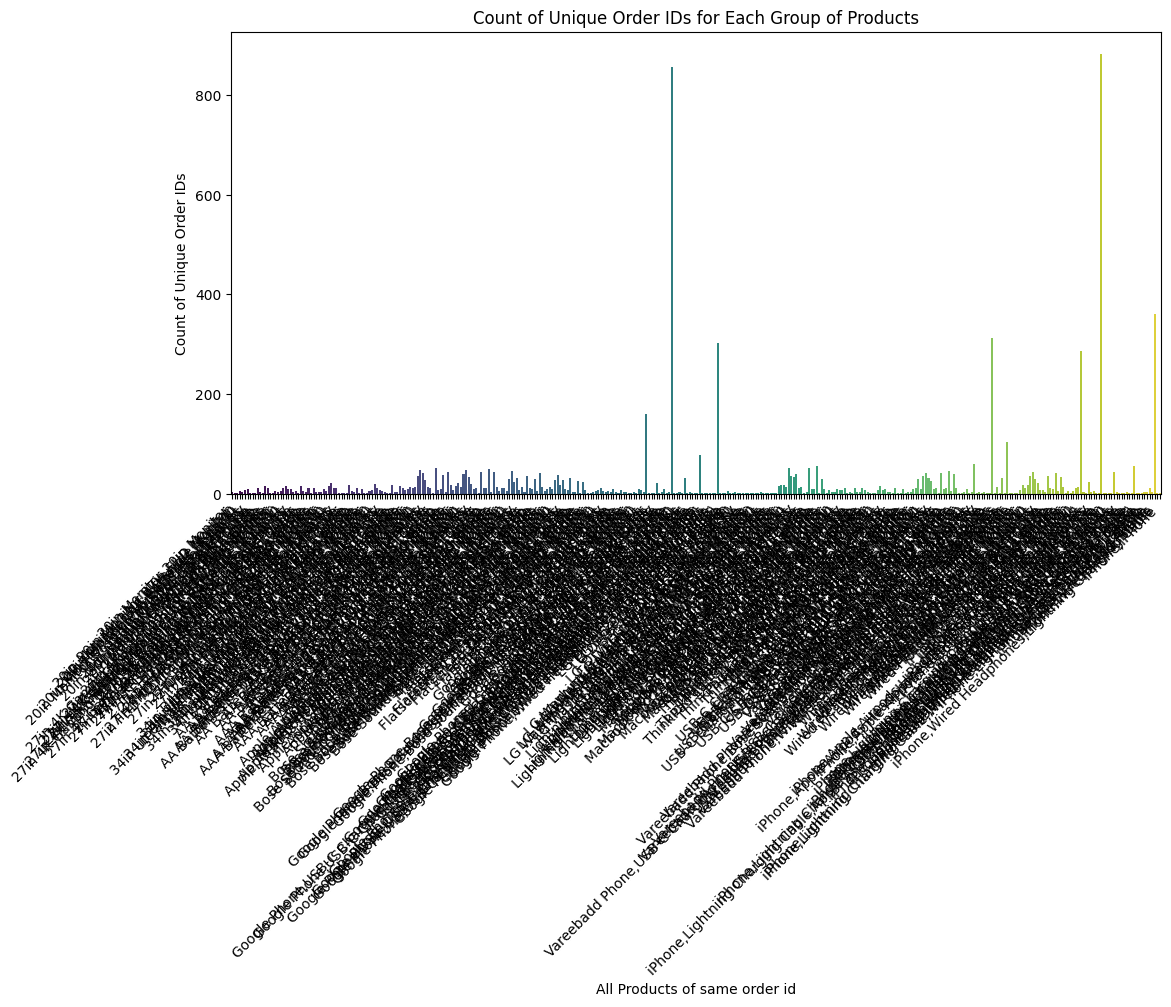

In [184]:
barplot_data = dup_df.groupby("All Products of same order id").count()["Order ID"].reset_index()
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='All Products of same order id', y='Order ID', data=barplot_data, palette="viridis")
plt.title("Count of Unique Order IDs for Each Group of Products")
plt.xlabel("All Products of same order id")
plt.ylabel("Count of Unique Order IDs")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


<h3 style="color:purple;"> Writing the file to csv</h3>

In [186]:
all_months_df.to_csv("12_months_data.csv")